In [6]:
import re

import numpy as np
import pandas as pd
import requests

#%matplotlib notebook
%matplotlib inline

In [7]:
def numeric_from_bw_string(bw_string):
    bw_string = bw_string.replace(",", ".")
    numeric, units = bw_string.split(maxsplit=1)
    numeric = float(numeric)
    if "KB/s" in units:
        return numeric / 1024.0
    if "MB/s" in units:
        return numeric
    raise ValueError("What is that? %s" % bw_string)

In [8]:
def dataframe_from_content(content, name):
    content_split = [
        re.split(r"(\(|\))", line) for line in content.split("\n") if line.strip()
    ]
    df = pd.DataFrame.from_records(content_split)
    df[0] = pd.to_datetime(df[0])
    df[2] = df[2].apply(numeric_from_bw_string)
    df = df.set_index(0)
    df = df.resample("10min").mean()
    return df[[2]].rename({2: "%s bandwidth (MB/s)" % name}, axis="columns")

In [9]:
BASE_URL = "https://cloud.stacktile.io/index.php/s/kmEorGKyfBzZcz7"

URLS = {
    "Dan": f"{BASE_URL}/download?path=%2F&files=bandwidth.log",
    "Mike": f"{BASE_URL}/download?path=%2FMike%20Bandwidth&files=bandwidth%20(2).log",
    "Robert": f"{BASE_URL}/download?path=%2FBob%20Bandwidth&files=bandwidth-rbu.log",
}

In [10]:
df = None
for name, url in URLS.items():
    print("Working on %s" % name)
    content = requests.get(url).text
    new_df = dataframe_from_content(content, name)
    if df is None:
        df = new_df
    else:
        df = df.merge(new_df, left_index=True, right_index=True, how="outer")
# df.plot()

Working on Dan
Working on Mike
Working on Robert


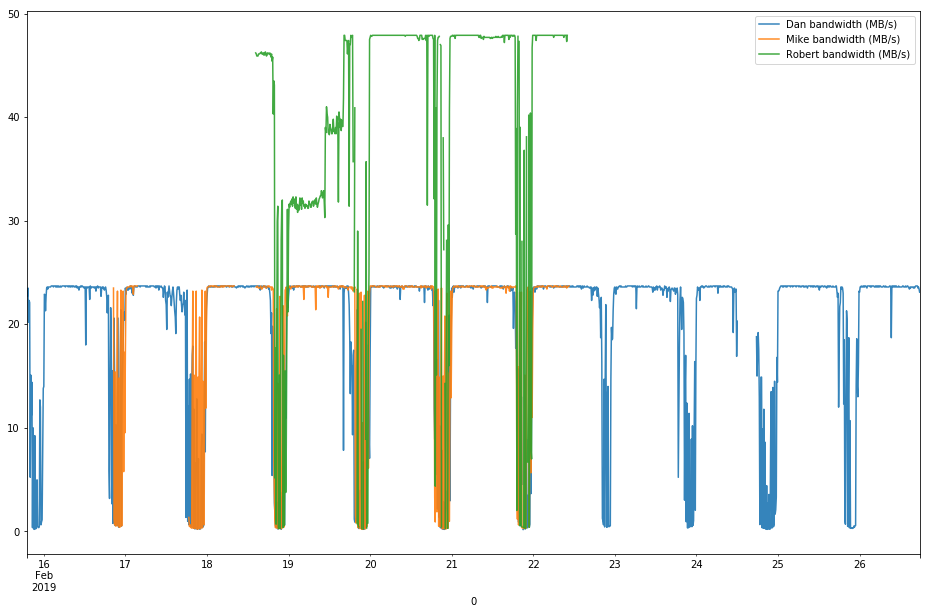

In [11]:
df.plot(figsize=(16, 10), alpha=0.9)

In [12]:
df_rel = df / df.max()

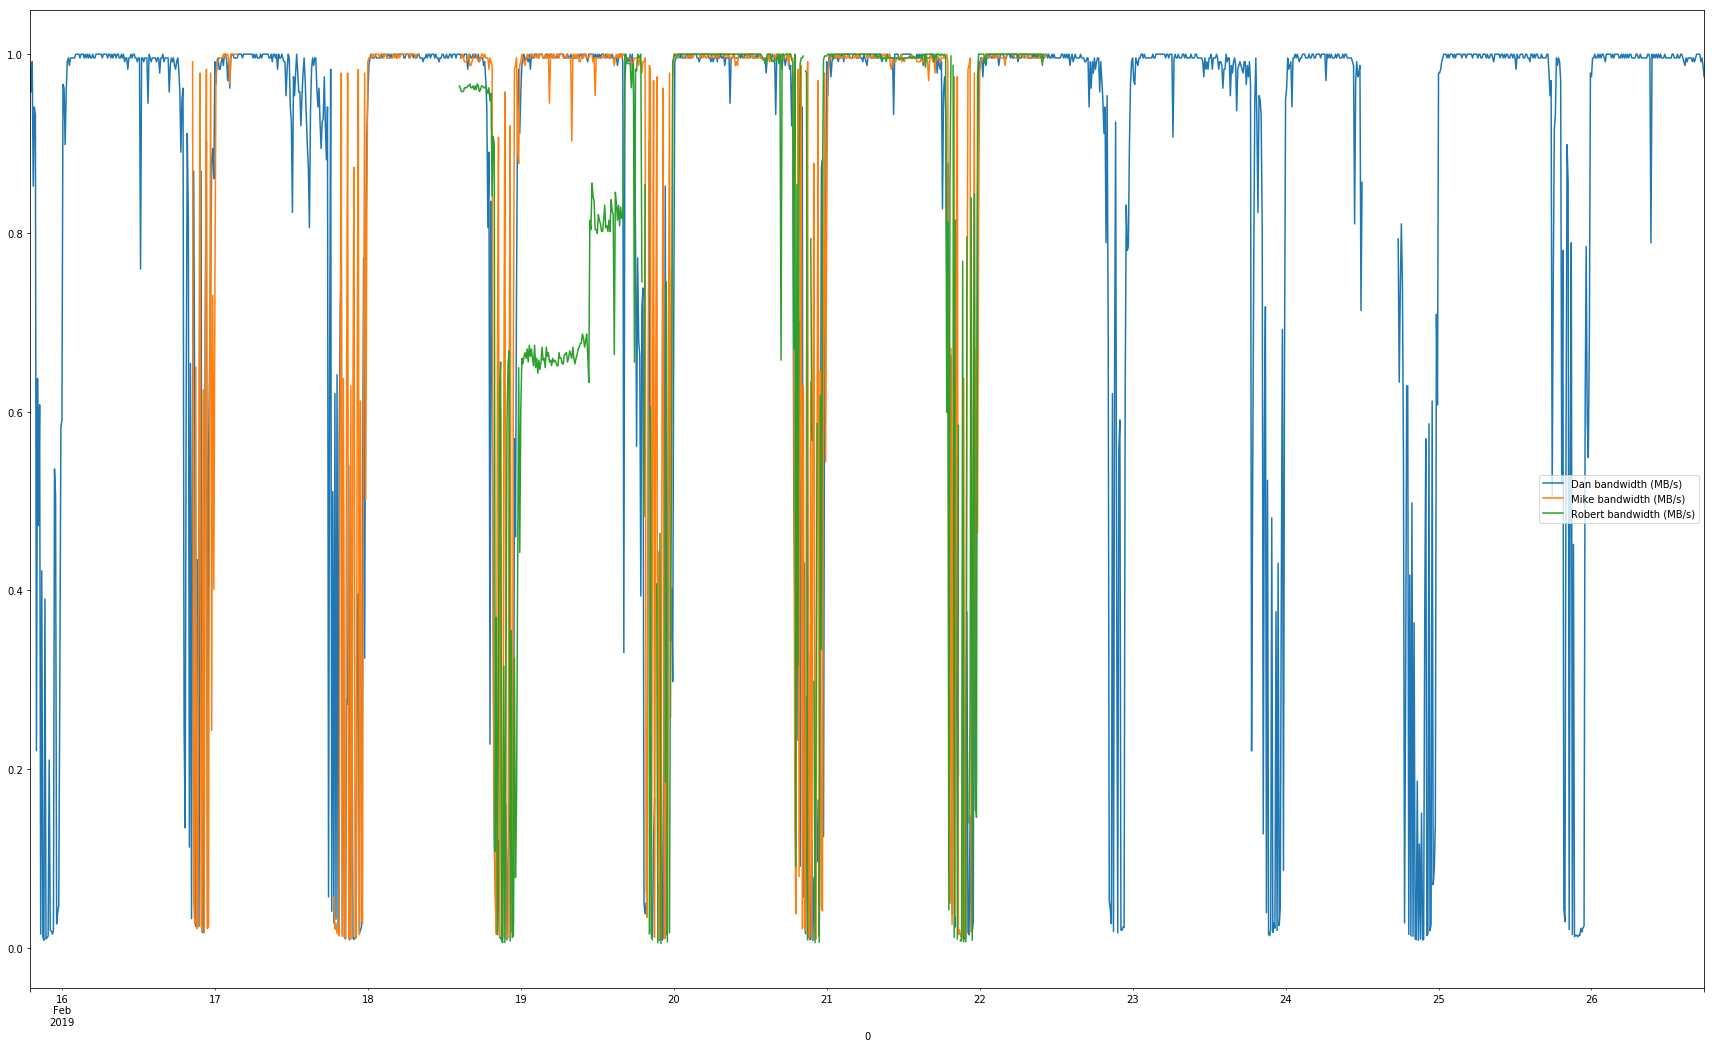

In [13]:
df_rel.plot(figsize=(30, 18))

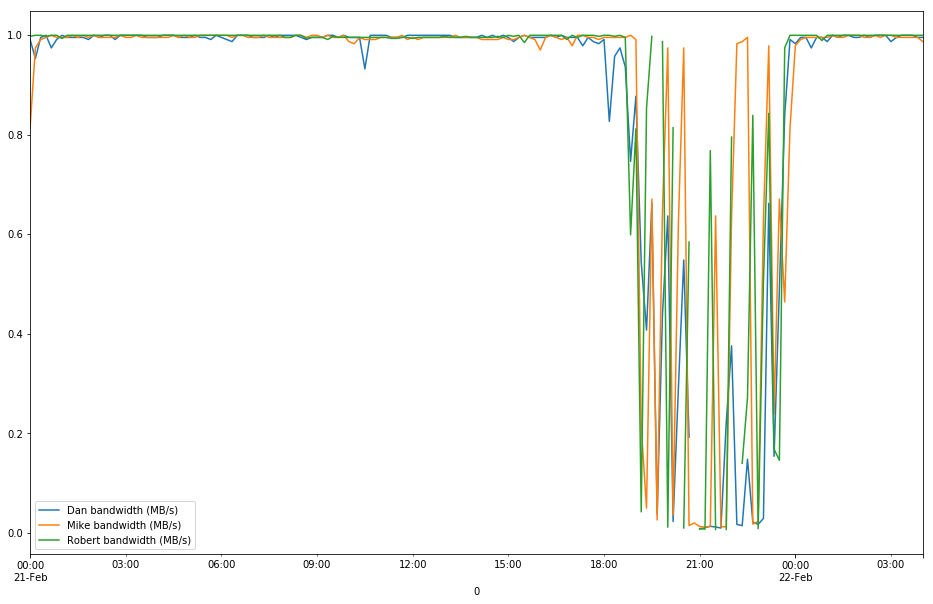

In [14]:
df_rel["2019-02-21":"2019-02-22 04:00"].plot(figsize=(16, 10))

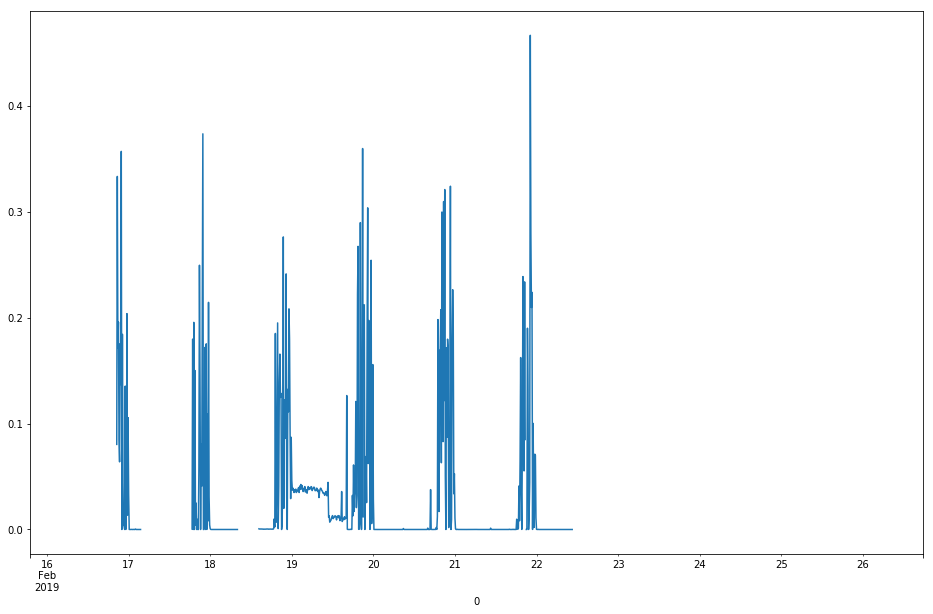

In [15]:
df_rel.var(axis=1).plot(figsize=(16, 10))